## Problem Statement:
[House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
housing = pd.read_csv('housing.csv')
housing.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Only date column is **Object** type. Let's make the date column datatype to int64

In [4]:
housing['date'] = pd.to_datetime(housing.date).view('int64')
housing.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: date
Non-Null Count  Dtype
--------------  -----
21613 non-null  int64
dtypes: int64(1)
memory usage: 169.0 KB


In [5]:
# checking null values
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Feature Engineering

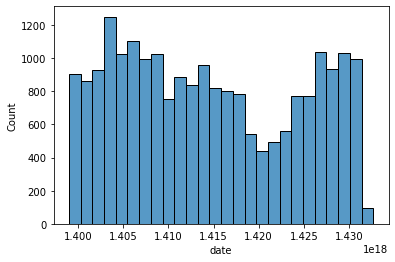

In [6]:
# let's check distribution of  date column
sns.histplot(x='date',data=housing)
plt.show()

### Assumptions of linear regression:
1. Linear relationship
2. Homoscedasticity(Equal variance)
3. Normality (No outlier)
4. Independence (No auto correlation of Residual)
5. No relation between Residual and independet variable
6. No multi-colinearity

### Checking 1st Assumption- Linear relationship visually by plotting

In [7]:
X = housing.drop('price',axis=1)
y = housing.price
print('Number of independent variables = ', len(X.columns))

Number of independent variables =  20


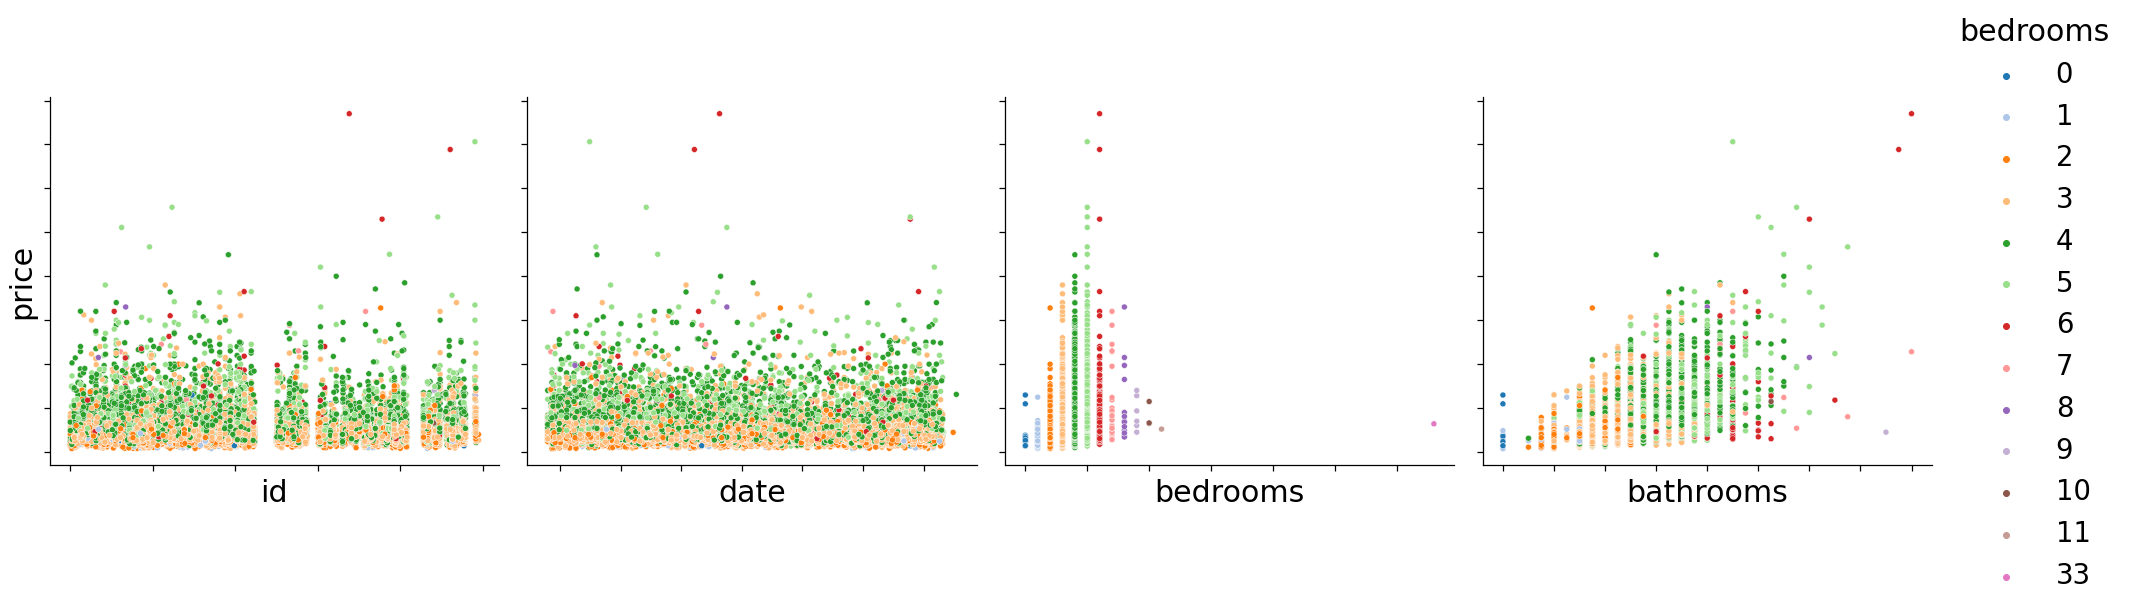

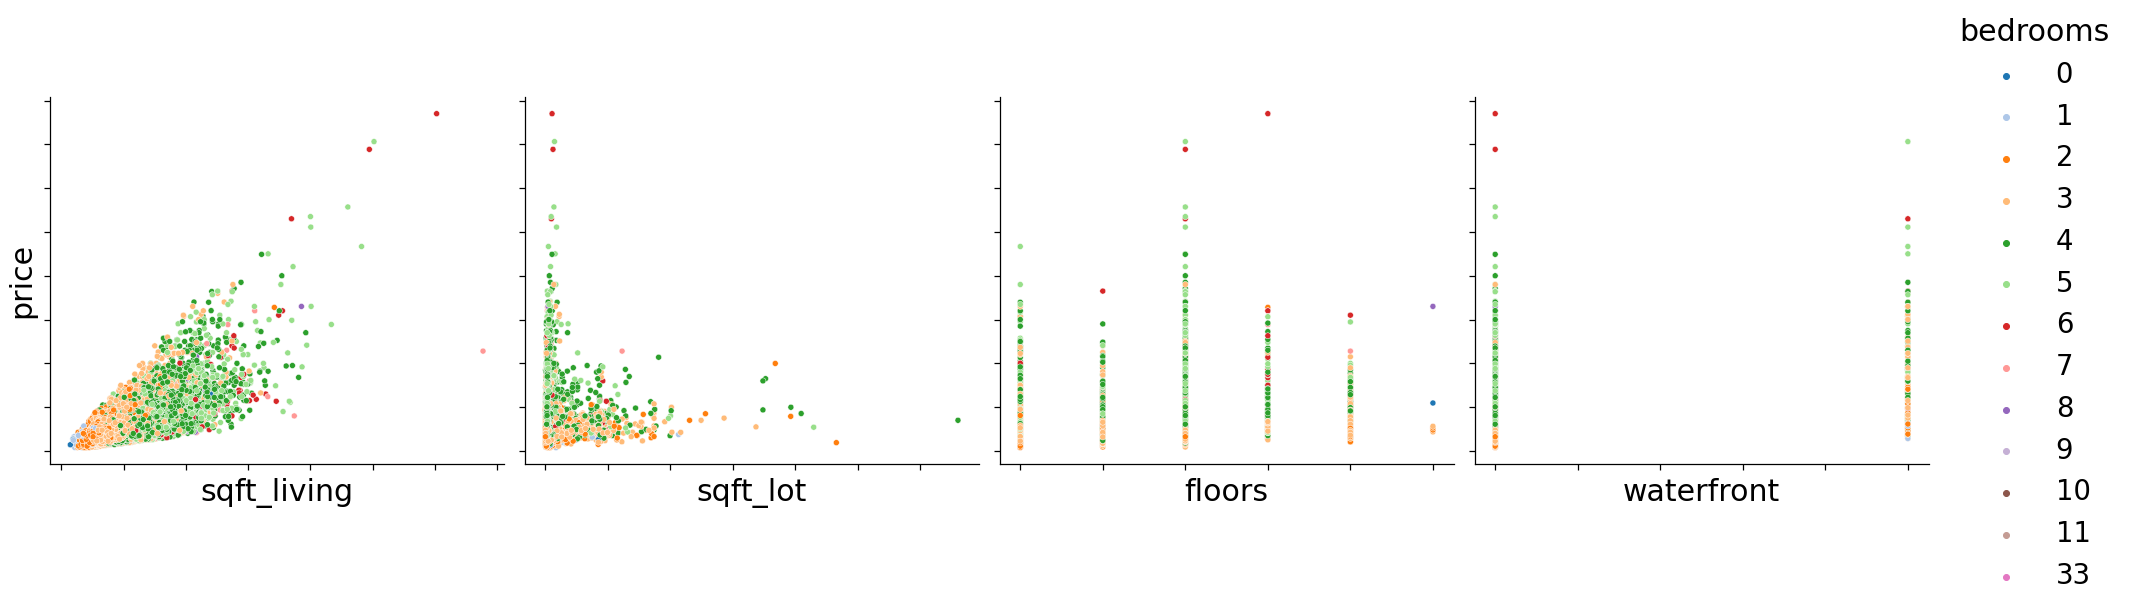

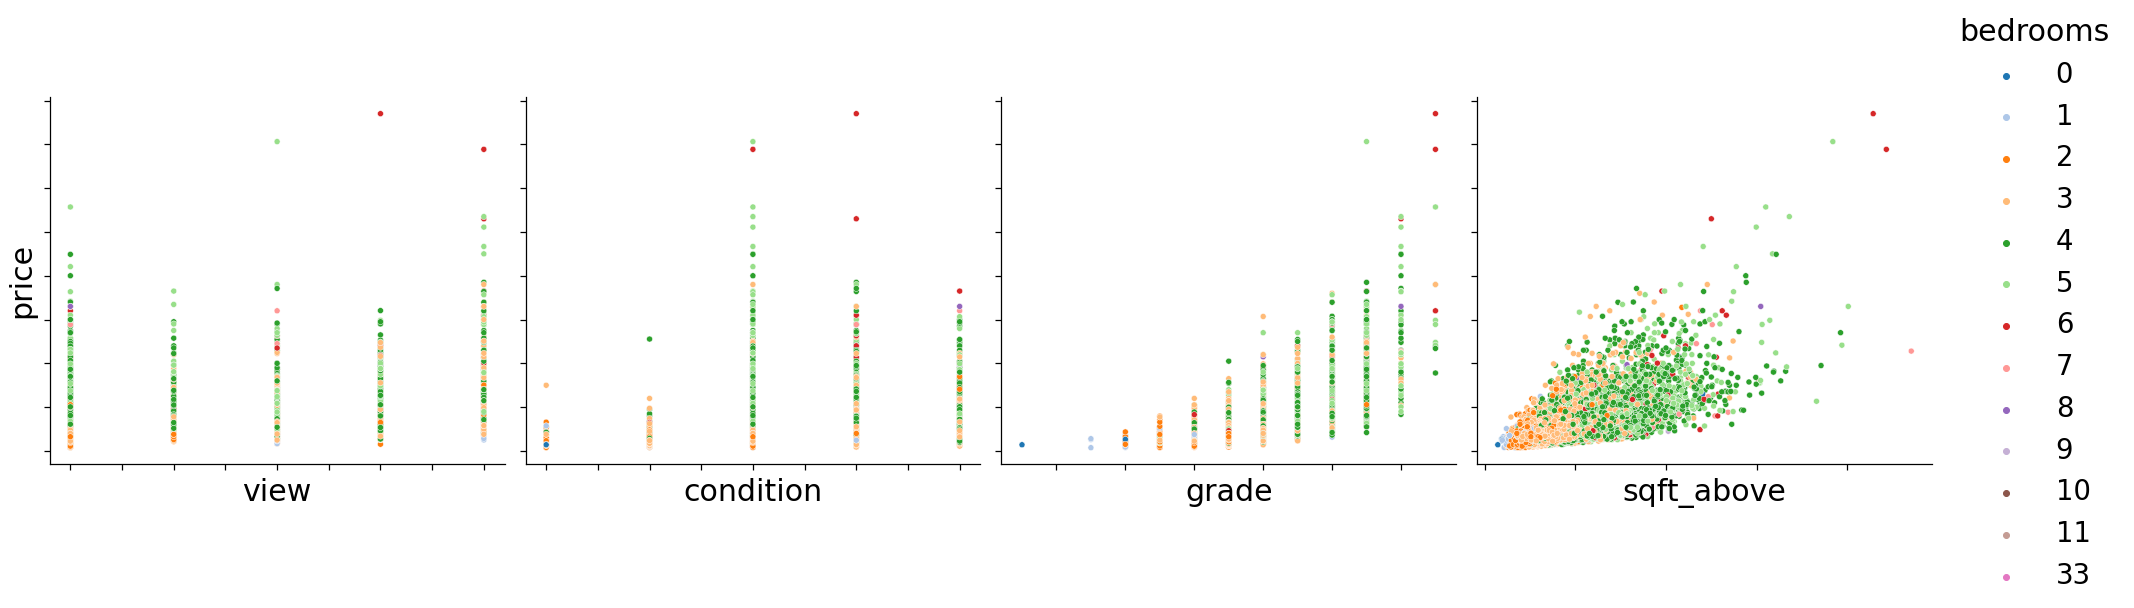

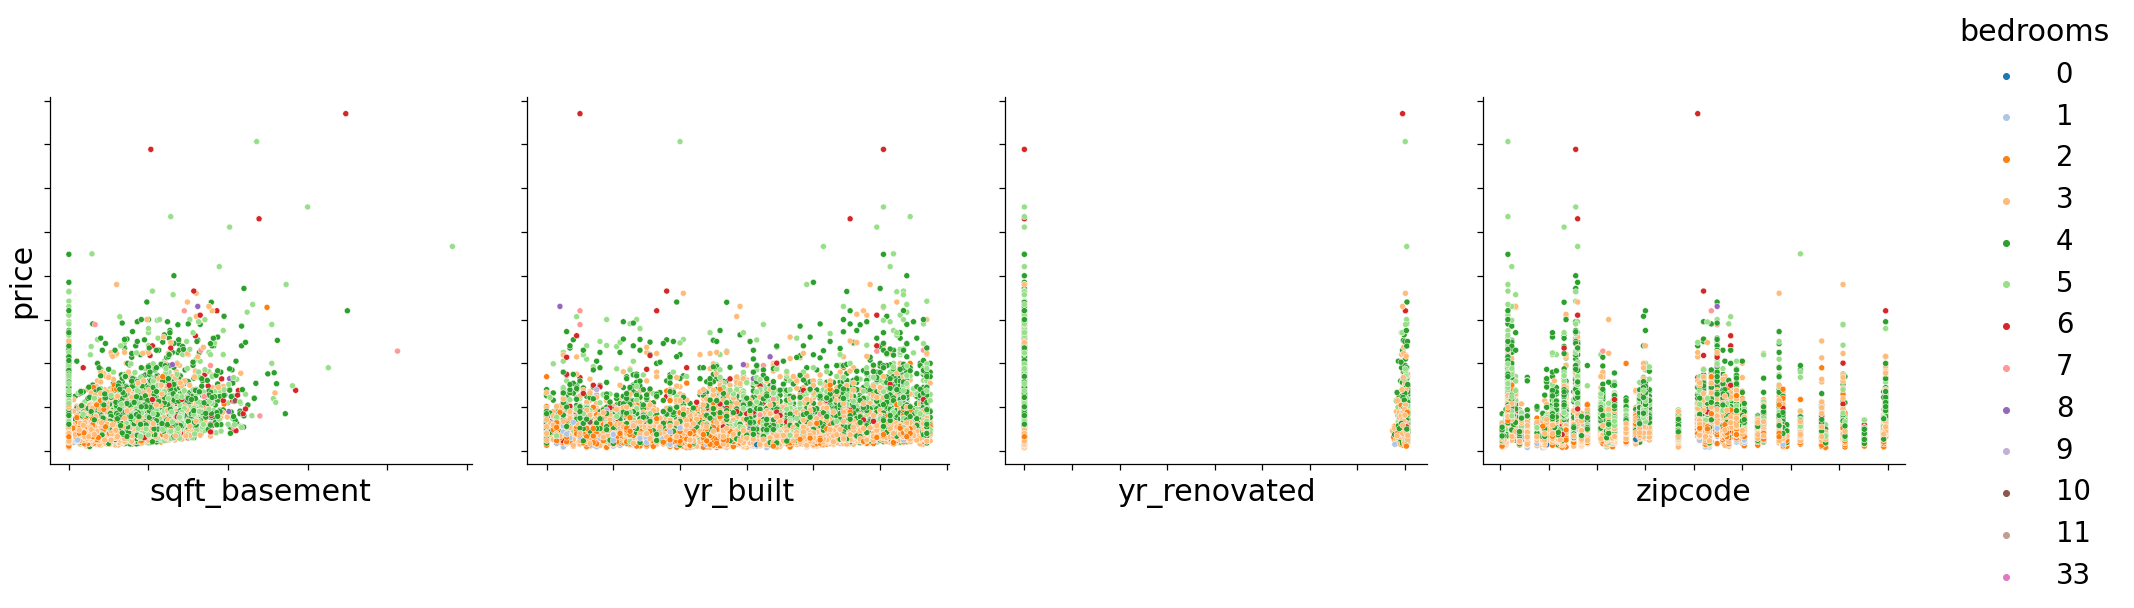

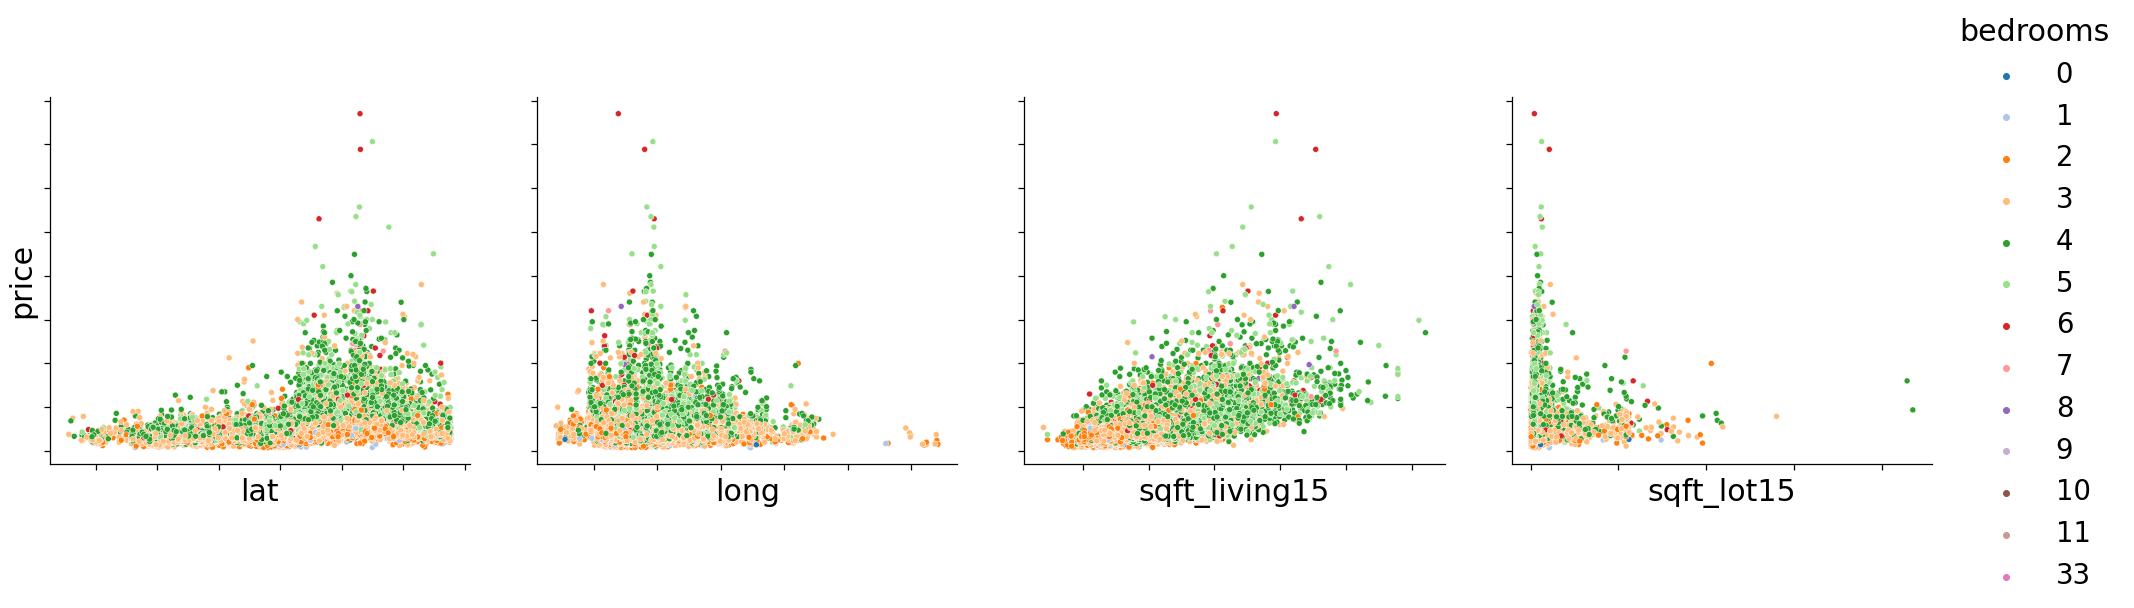

In [8]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(x_vars=X.columns[0:4],y_vars=['price'], data=housing,height=7,
                                         hue='bedrooms',palette='tab20')
    h = sns.pairplot(x_vars=X.columns[4:8],y_vars=['price'], data=housing,height=7,
                                         hue='bedrooms',palette='tab20')
    i = sns.pairplot(x_vars=X.columns[8:12],y_vars=['price'], data=housing,height=7,
                                         hue='bedrooms',palette='tab20')
    j = sns.pairplot(x_vars=X.columns[12:16],y_vars=['price'], data=housing,height=7,
                                         hue='bedrooms',palette='tab20')
    k = sns.pairplot(x_vars=X.columns[16:20],y_vars=['price'], data=housing,height=7,
                                         hue='bedrooms',palette='tab20')
    
g.set(xticklabels=[],yticklabels=[])
h.set(xticklabels=[],yticklabels=[])
i.set(xticklabels=[],yticklabels=[])
j.set(xticklabels=[],yticklabels=[])
k.set(xticklabels=[],yticklabels=[])
plt.show()

**bedrooms, bathrooms, sqft_living, sqft_lot, grade, sqft_above, sqft_basement, sqft_living15, sqft_lot15** show good linear relationship.

#### Let's make a model to check furether assumptions

In [9]:
# Making a model taking all features under consideration
X_add_const = sm.add_constant(X)
lr = sm.OLS(housing['price'],X_add_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           5.49e-40
Time:                        03:03:05   Log-Likelihood:            -3.0751e+05
No. Observations:               21613   AIC:                         6.150e+05
Df Residuals:                   21609   BIC:                         6.151e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.752e-10   3.48e-10      0.504

$R^2$ is horrible. **t-stat** of the **`date`** column is highest among all.

### Checking 2nd Assumption- Homoscedasticity by plotting `y vs residuals`

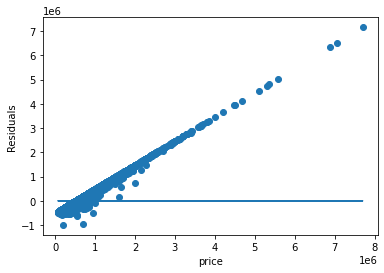

In [10]:
Residuals = lr.resid
plt.scatter(y,Residuals)
plt.plot(y,[0]*len(y))
plt.xlabel('price')
plt.ylabel('Residuals')
plt.show()

Model fails the second assumption of equal variance. Let's check 5th assumption

### Checking 5th Assumption- No relation between Residual and independet variable

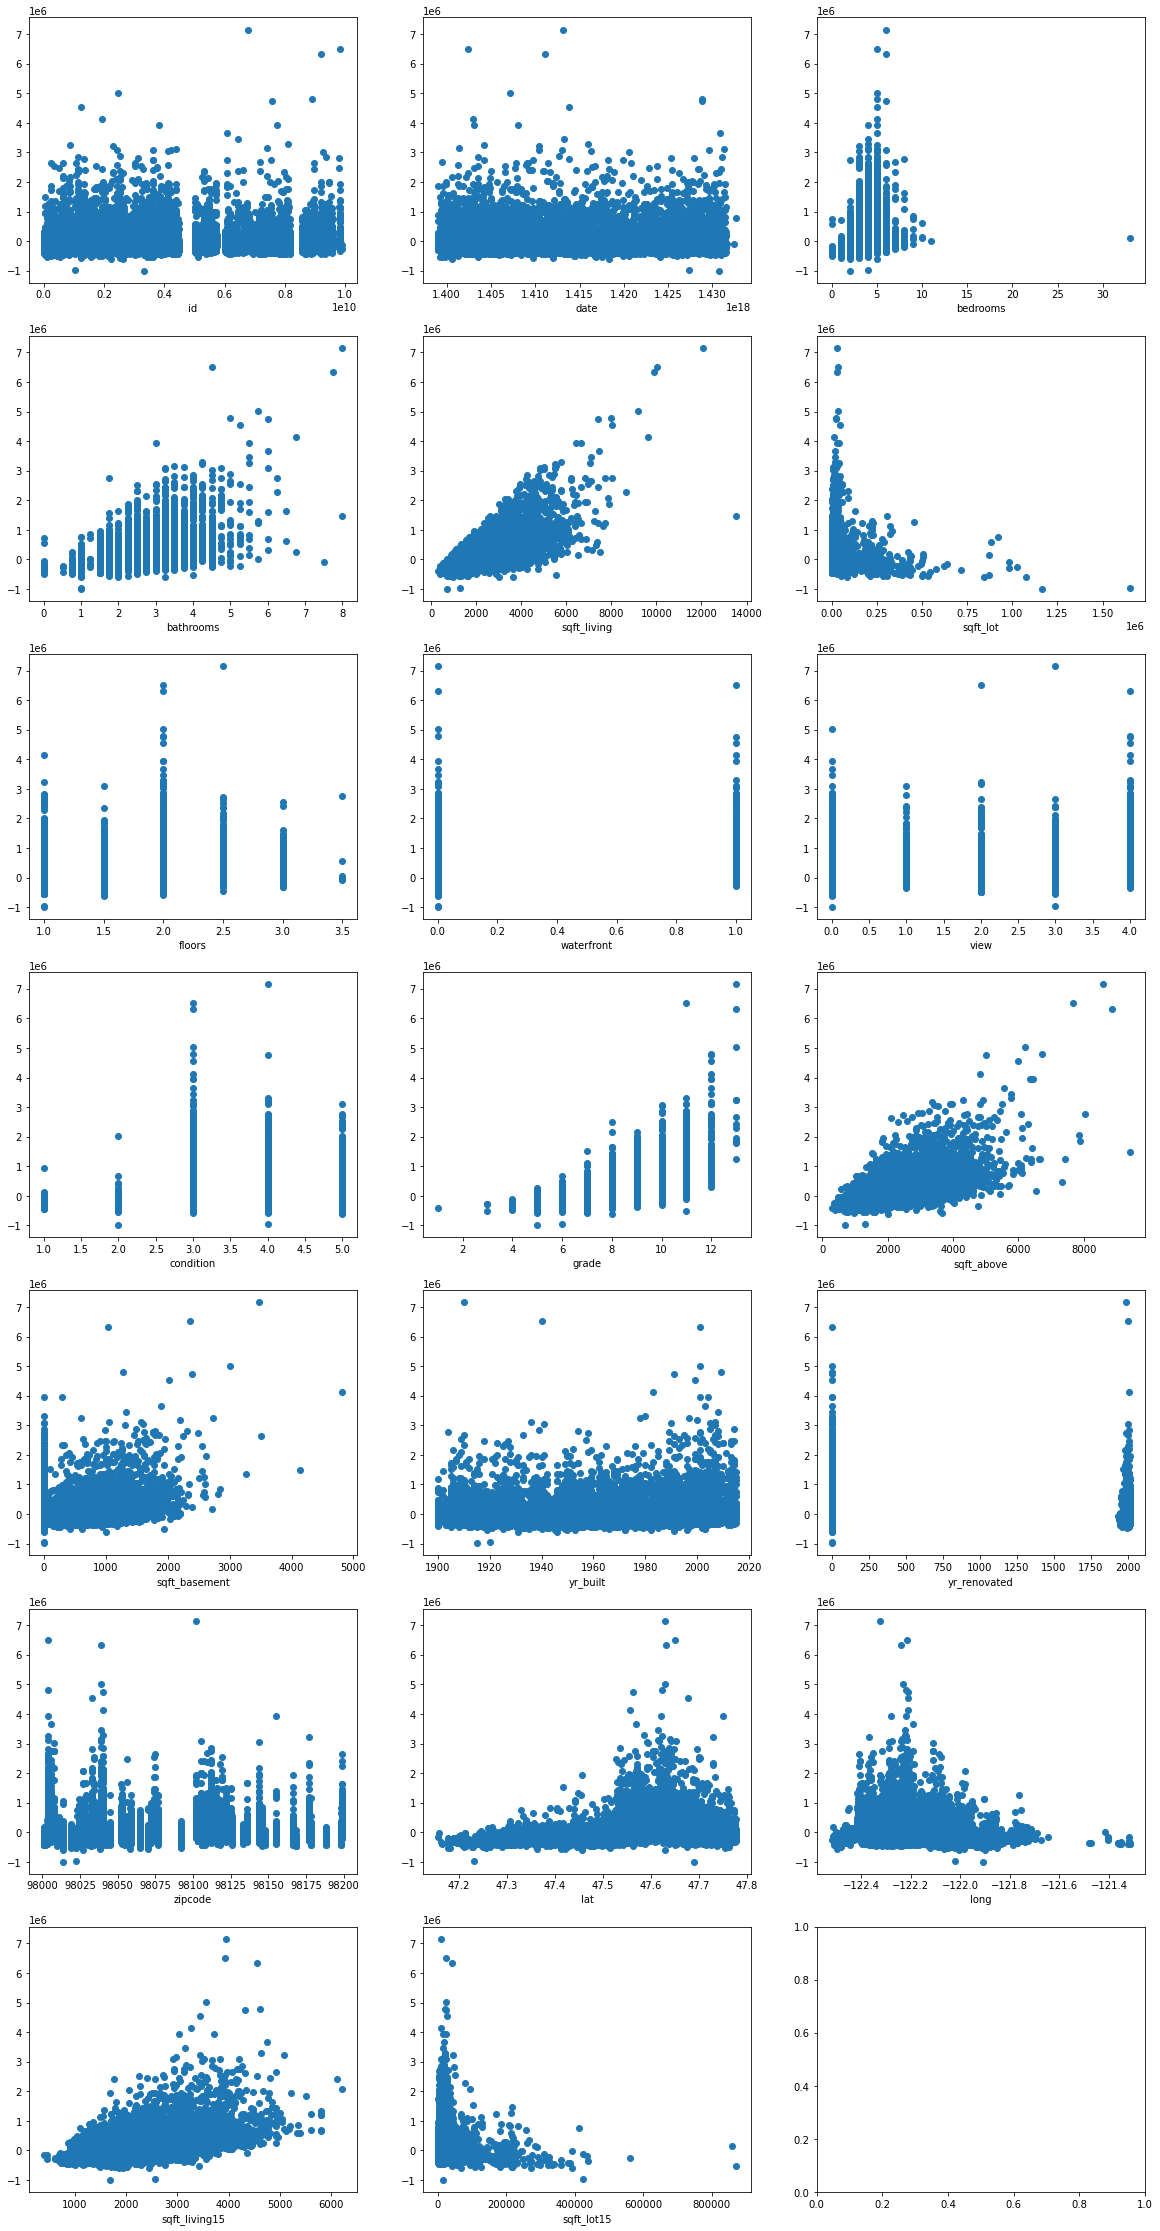

In [11]:
#Scatter plot for each features against Residual

#creating feature list 
feature_col = list(X.columns)

# We have 20 features to plot at 7x3 subplots. 
ncols= 3
nrows= (len(feature_col) + ncols)//ncols

#creating total number of plot for histogram
fig,axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,40))

for index, col_name in enumerate (feature_col):
    plt.subplot(nrows,ncols,index+1)
    plt.scatter(x=X[col_name],y=Residuals)
    plt.xlabel(col_name)
plt.show()

Some Features are correlated with Residual. So 5th assumption gets failed

$\because$ **`date`** column has high **t-stat** in above model it is most influential to get poor result. So, let's remove the date column.

In [12]:
housing_feature = housing.drop(['price','date'],axis=1)
X_add_const = sm.add_constant(housing_feature)
lr = sm.OLS(housing['price'],X_add_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:03:18   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.939e+06   2.93e+06      2.366

After droping **date** column result is far better$(R^2=70\%)$. Let's remove the date column.

From [Maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)

${\displaystyle L_{n}(\theta )=\prod _{i=1}^{n}\,f_{k}^{\mathsf {univar}}(y_{k};\theta )}
~~~~~~~~~where~~\theta=vector~of~parameters$


$\therefore~Likelyhood~{\displaystyle L(\hat\beta_0,\hat\beta_1\dots,\hat\beta_n,\hat\sigma)=\prod _{i=1}^{n}{\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {y_i-(\hat\beta_0+\hat\beta_1x_1+\dots+\hat\beta_nx_n) }{\sigma }}\right)^{2}}= \prod _{i=1}^{n}
\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {Residual }{\sigma }}\right)^{2}}$

$\therefore ~log~likelyhood~(l)=\displaystyle{\frac{n}{2}ln(2\pi\sigma^2)+\frac{1}{2\sigma^2}\sum_{i=1}^n}(Residual)^2$

$\sigma(OLS) = \frac{(Residual)^2}{n-2}$

$\sigma(MLE) = \frac{(Residual)^2}{n}$

$k=$ nuber of features<br>
$n=$ number of samples<br>
$p=$ number of parameters $(\beta_0,\beta_1,\dots)$

$F-stat = \displaystyle{\frac{(Residual^2_{mean} - Residual^2_{fit})(n-p_{fit})}{(Residual^2_{fit})(p_{fit}-p_{mean})}}$

$R^2 = \frac{Residual^2_{mean} - Residual^2_{fit}}{Residual^2_{mean}}$

$(Adj)R^2=1-\displaystyle{\frac{(1-R^2)(n-1)}{(n-k-1)}}$

**AIC** $= 2k -2l$

**BIC** $=kln(n)-2l$

### Checking 2nd Assumption- Homoscedasticity by plotting `y vs residuals`

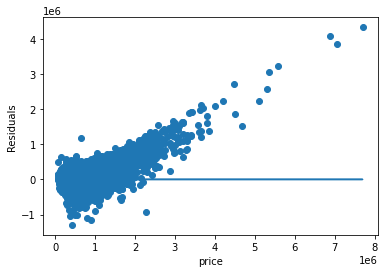

In [13]:
Residuals2 = lr.resid
plt.scatter(y,Residuals2)
plt.plot(y,[0]*len(y))
plt.xlabel('price')
plt.ylabel('Residuals')
plt.show()

Distribution is comparatively better but still there is some kind of correlation.

### Checking 3rd Assumption- Normality

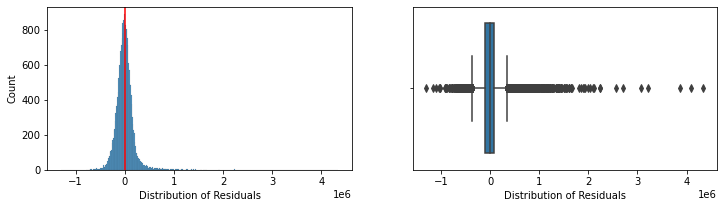

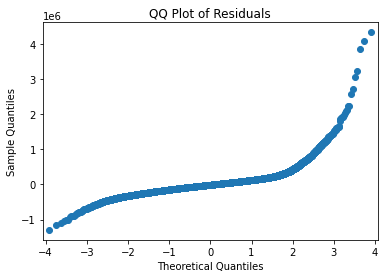

In [14]:
plt.subplots(1,2,figsize=(12,3))

plt.subplot(1,2,1)
sns.histplot(Residuals2)
plt.xlabel('Distribution of Residuals')
plt.axvline(x=Residuals.mean(),color='r')

plt.subplot(1,2,2)
sns.boxplot(Residuals2)
plt.xlabel('Distribution of Residuals')

sm.qqplot(Residuals2)
plt.title('QQ Plot of Residuals')
plt.show()

Residual is not normally distributed with 0 mean.

### Checking 4th Assumption- Independence

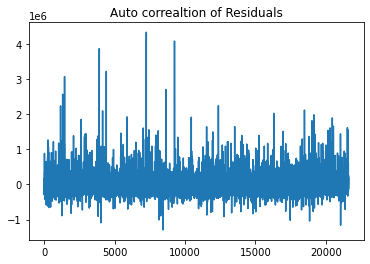

In [15]:
plt.plot(Residuals2.index,Residuals2)
plt.title('Auto correaltion of Residuals')
plt.show()

No auto correlation of residuals.

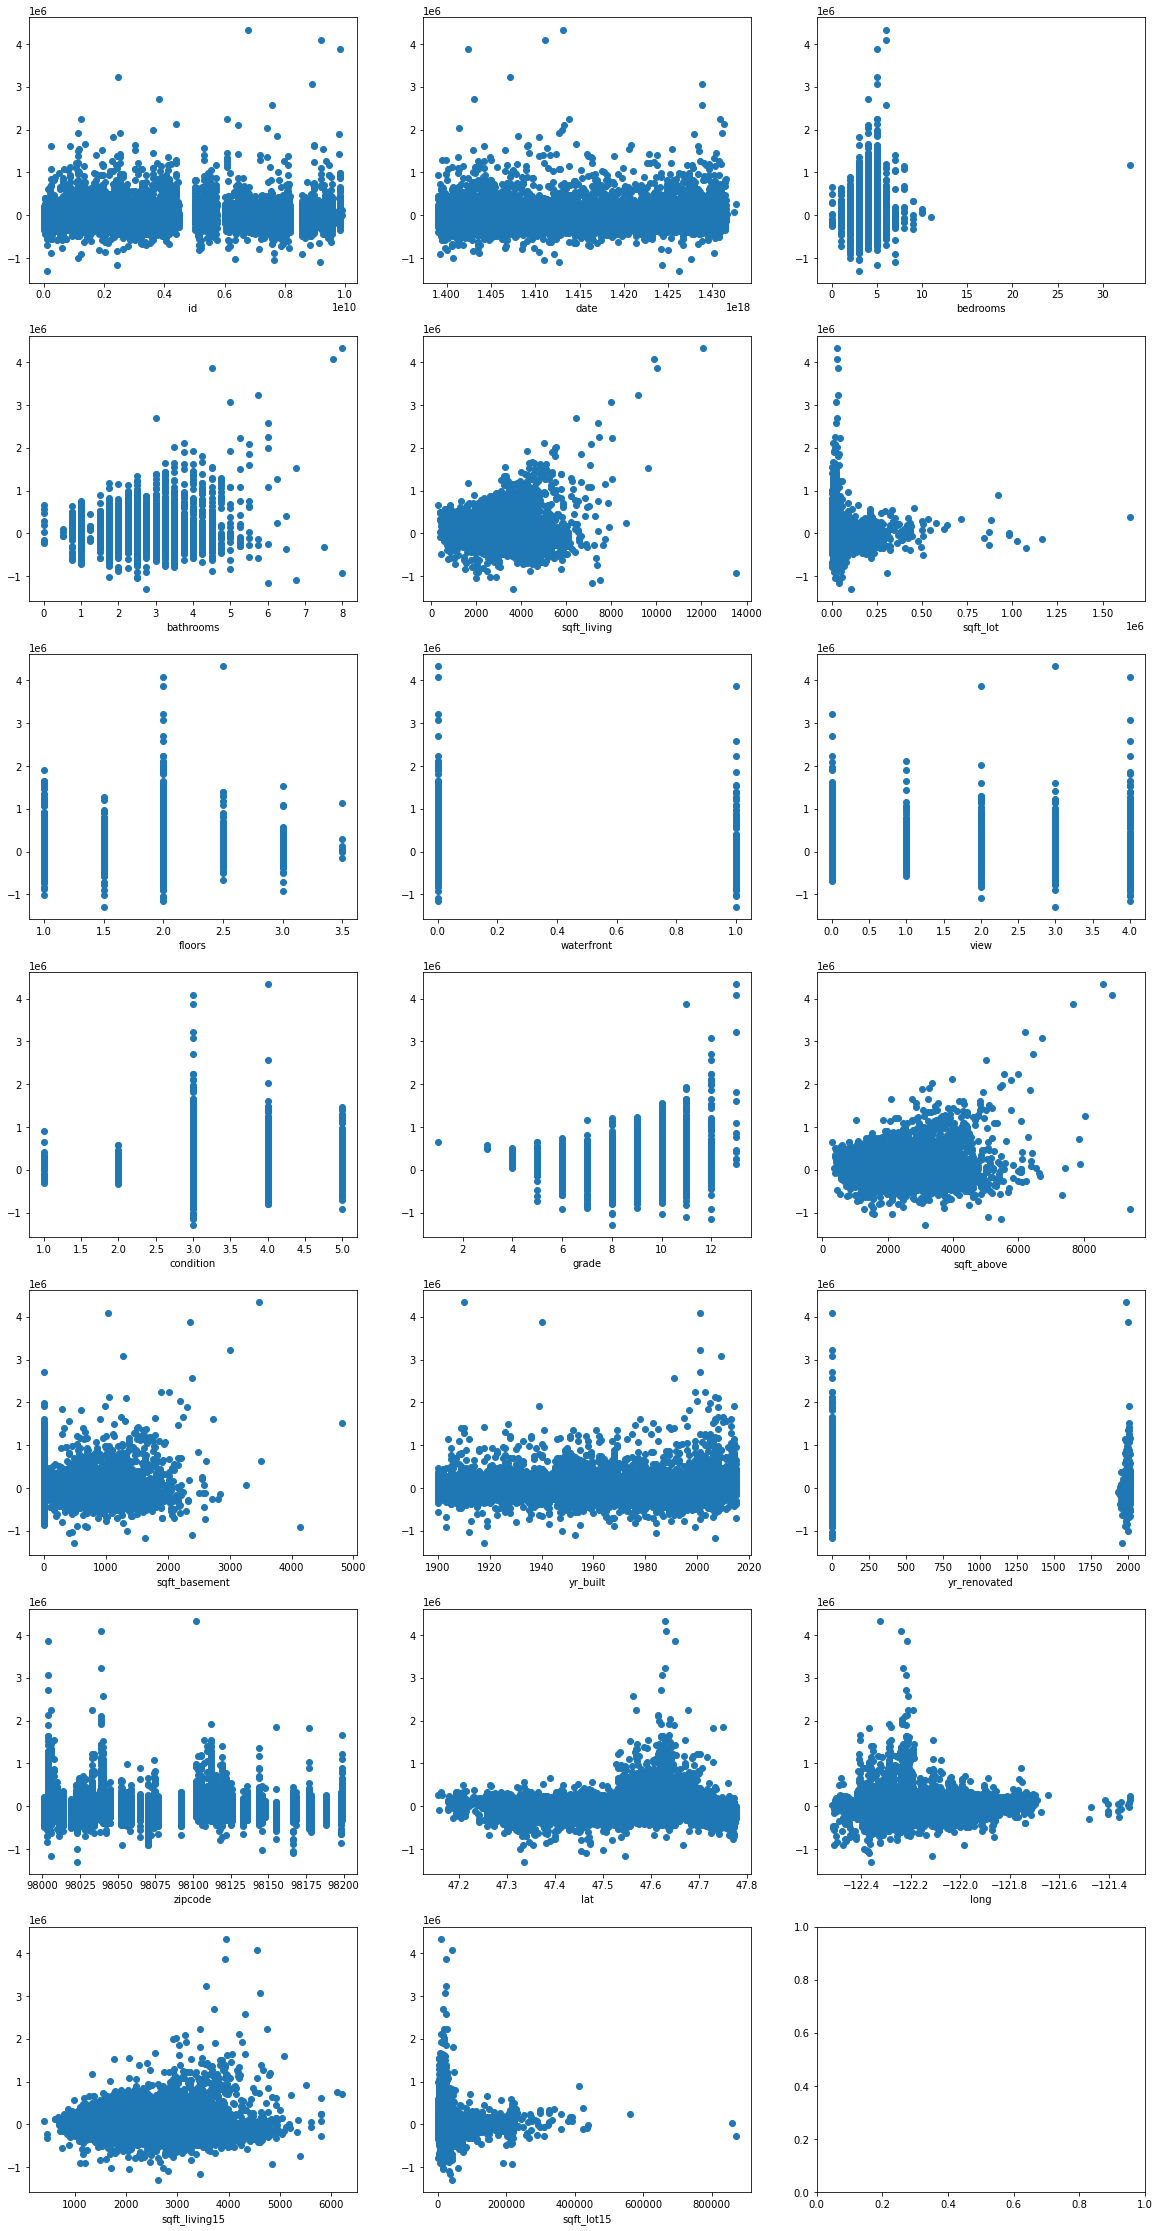

In [16]:
#Scatter plot for each features against Residual

#creating feature list 
feature_col = list(X.columns)

# We have 20 features to plot at 7x3 subplots. 
ncols= 3
nrows= (len(feature_col) + ncols)//ncols

#creating total number of plot for histogram
fig,axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,40))

for index, col_name in enumerate (feature_col):
    plt.subplot(nrows,ncols,index+1)
    plt.scatter(x=X[col_name],y=Residuals2)
    plt.xlabel(col_name)
plt.show()

Result is comparatively better than previous plot,

#### Conclusion?
Date column should be removed from the features.

In [17]:
# cereating list of columns to be dropped in future for prediction
DropList = ['price','date']

**Let's check Distribution of target column**

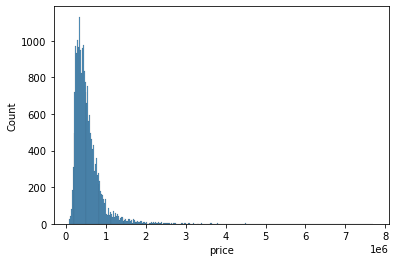

In [18]:
# Checking distribution of target column
sns.histplot(x='price',data=housing)
plt.show()

**Distribution of Target column is heavily skewed. Let's remove some outliers from right side.**

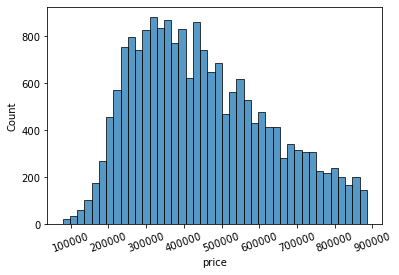

In [19]:
sns.histplot(x='price',data=housing[(housing.price>housing.price.quantile(0.0)) & (housing.price<housing.price.quantile(0.90))])
plt.xticks(rotation=20)
plt.show()

**Now target data is almost normally distributed. Let's check model accuracy again. Let's check model performance.**

In [20]:
housing_mod = housing[(housing.price>housing.price.quantile(0.0)) & (housing.price<housing.price.quantile(0.90))]
X_add_const = sm.add_constant(housing_mod.drop(['price','date'],axis=1))
lr = sm.OLS(housing_mod['price'],X_add_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     2208.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:03:35   Log-Likelihood:            -2.5186e+05
No. Observations:               19449   AIC:                         5.038e+05
Df Residuals:                   19430   BIC:                         5.039e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.329e+06   1.57e+06     -5.321

Result is getting worsed after removing outlier from target column.

### Checking Distribution of individual features

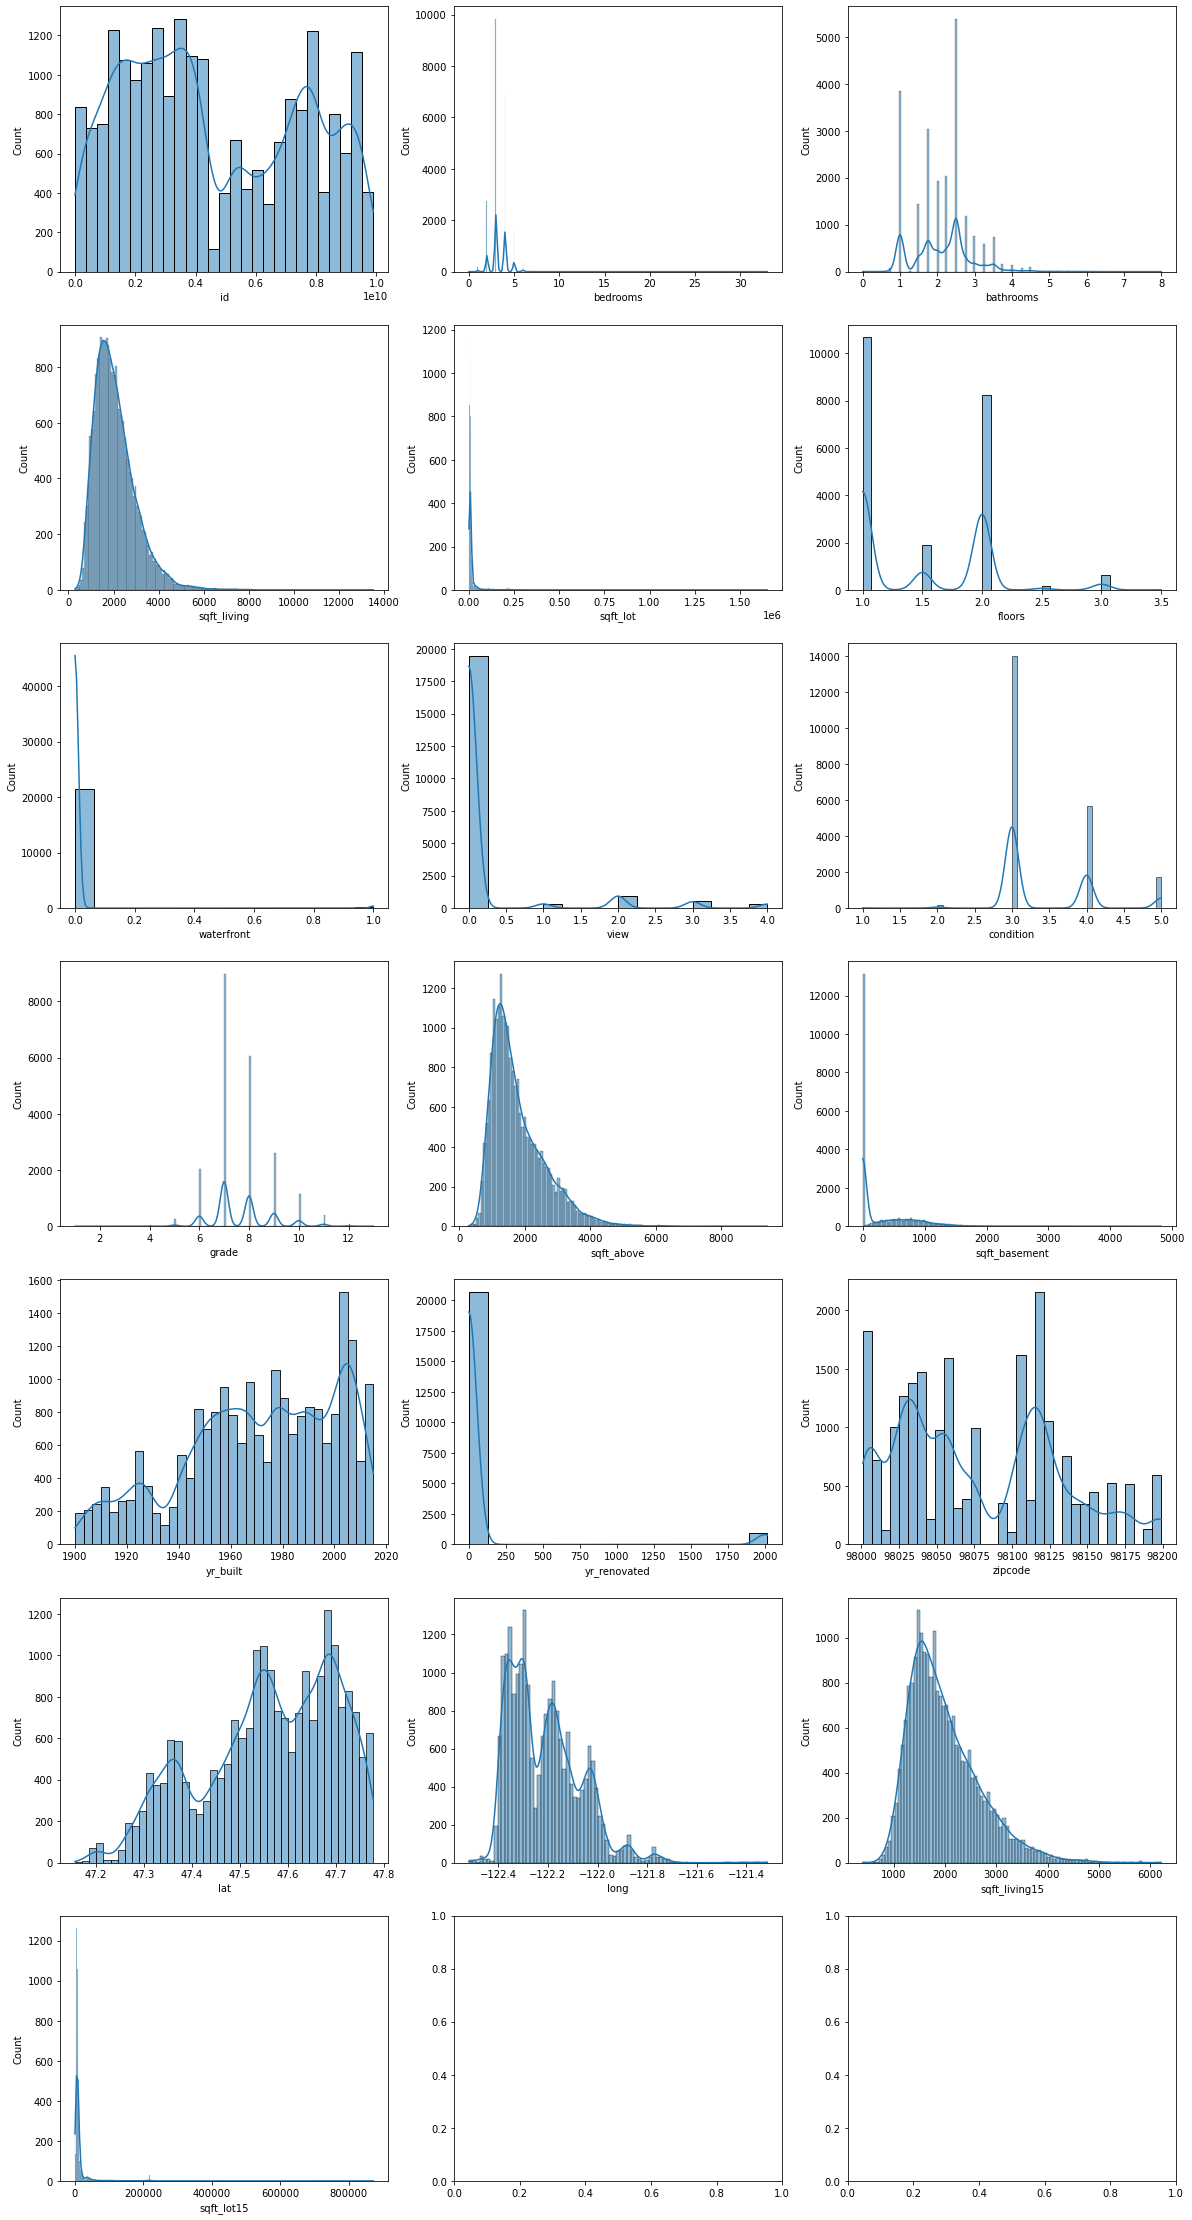

In [21]:
#Histogram plot for each features

#creating feature list 
feature_col = list(housing.drop(DropList,axis=1).columns)

# We have 19 features to plot at 7x3 subplots. 
ncols= 3
nrows= (len(feature_col) + ncols)//ncols


#creating total number of plot for histogram
fig,axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,40))

for index, col_name in enumerate (feature_col):
    plt.subplot(nrows,ncols,index+1)
    sns.histplot(housing[col_name],kde=True)

Some features are heavily skewed. Let's create the list of features having outlier.

In [22]:
outlier_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

housing_no_outlier = housing.copy()
for col_name in outlier_col:
    Q1 = housing[col_name].quantile(0.25)
    Q3 = housing[col_name].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    housing_no_outlier = housing_no_outlier.loc[(housing_no_outlier[col_name]<=UL) & (housing_no_outlier[col_name]>=LL)]

# calculating % data loss after removing outlier
data_loss = (1 - housing_no_outlier.shape[0]/housing.shape[0])*100
print('data_loss after removing outlier = ',np.round(data_loss,2),'%')

data_loss after removing outlier =  18.67 %


**Let's check distribution again**

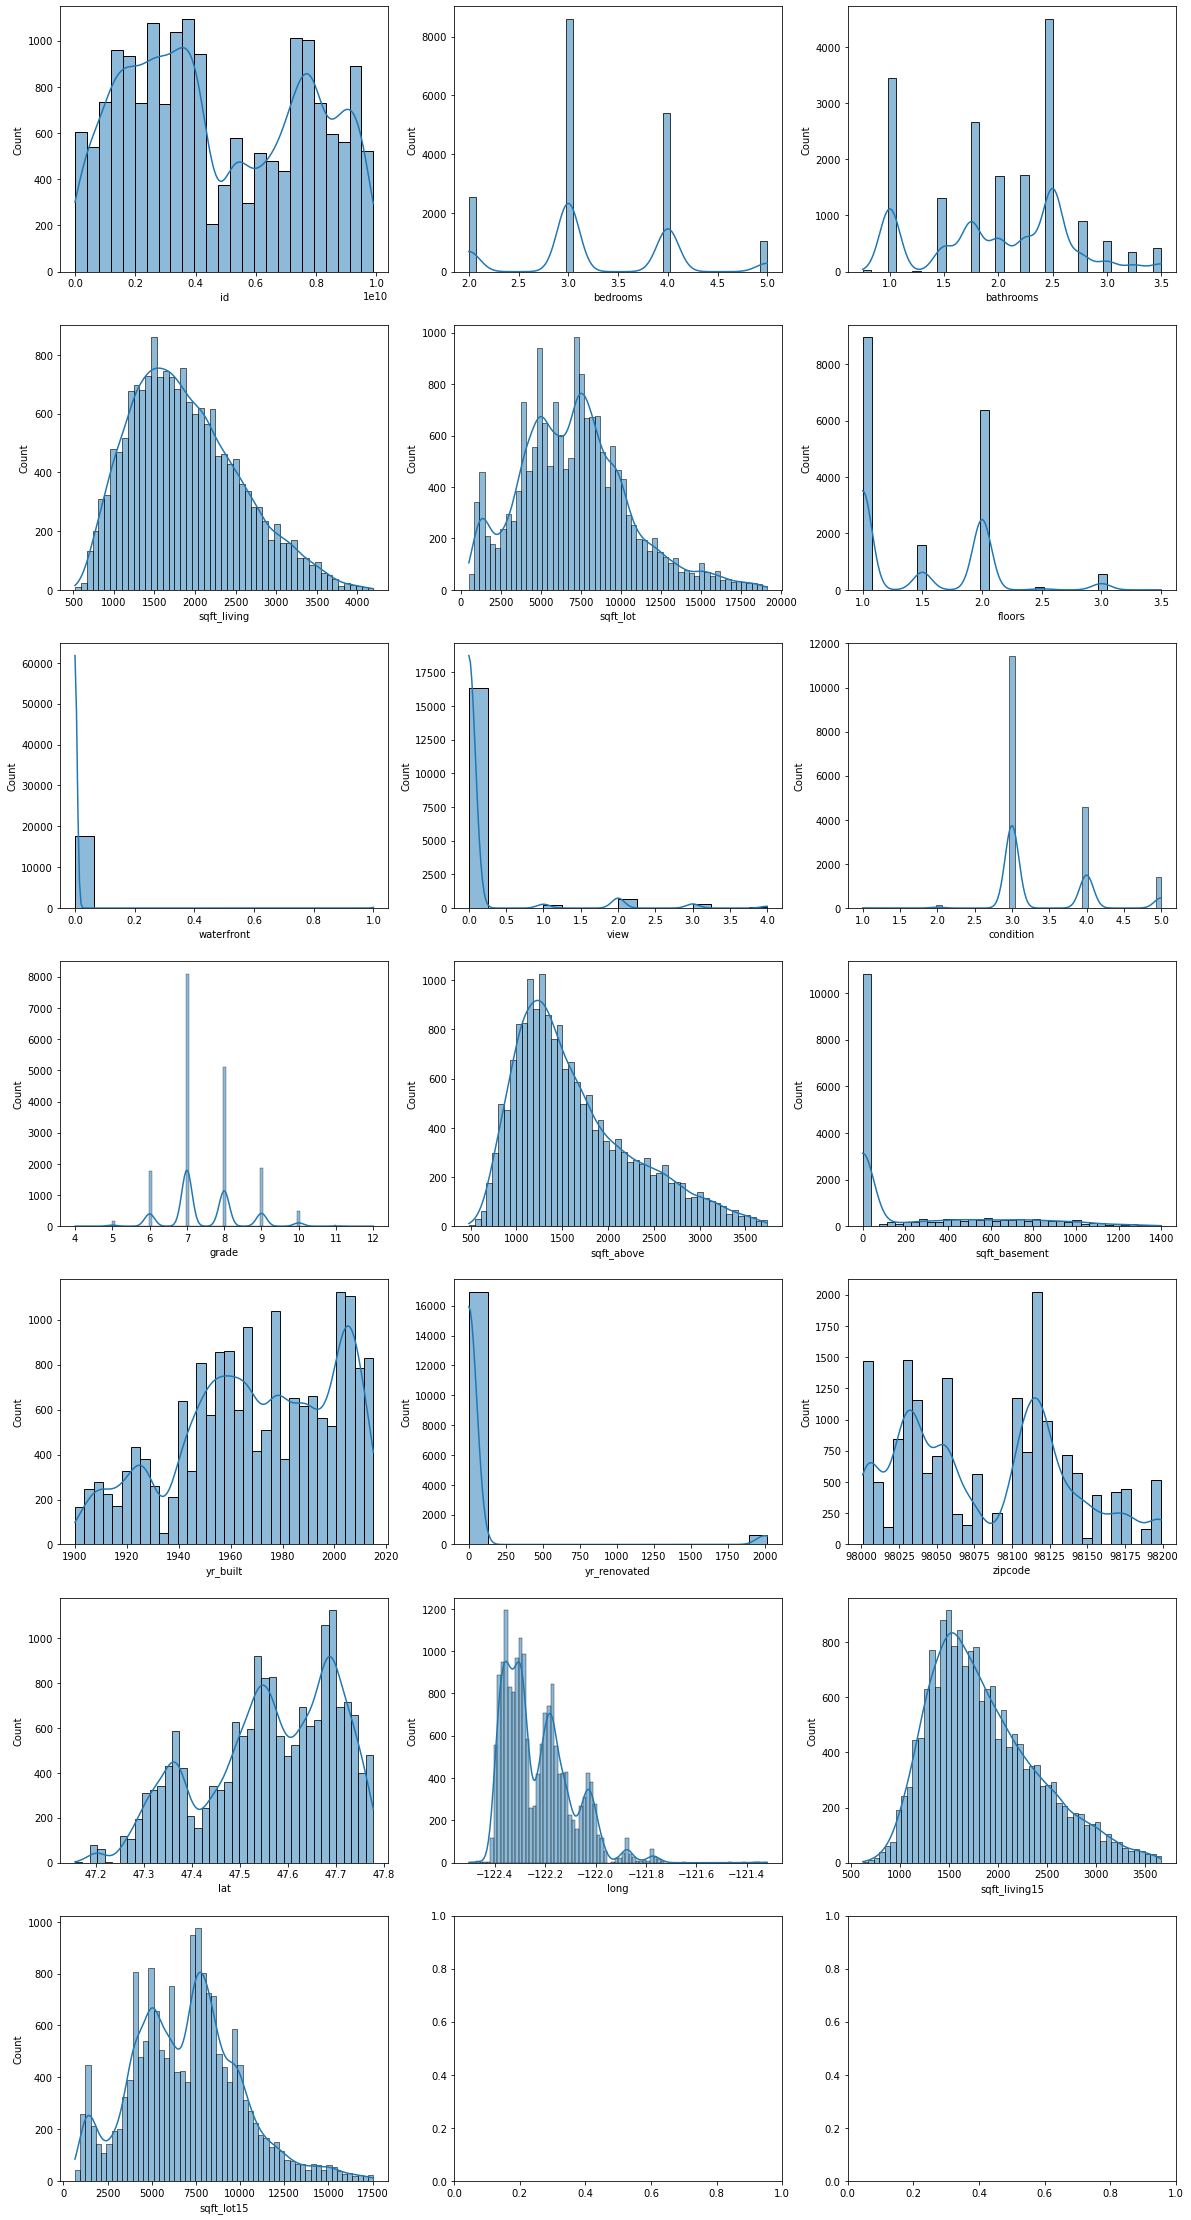

In [23]:
#Histogram plot for each features

#creating feature list 
feature_col = list(housing_no_outlier.drop(DropList,axis=1).columns)

# We have 19 features to plot at 7x3 subplots. 
ncols= 3
nrows= (len(feature_col) + ncols)//ncols


#creating total number of plot for histogram
fig,axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,40))

for index, col_name in enumerate (feature_col):
    plt.subplot(nrows,ncols,index+1)
    sns.histplot(housing_no_outlier[col_name],kde=True)

Now distributions are quite good. Let's build a model.

In [24]:
X_add_const = sm.add_constant(housing_no_outlier.drop(DropList,axis=1))
lr = sm.OLS(housing_no_outlier['price'],X_add_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     2048.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:04:38   Log-Likelihood:            -2.3299e+05
No. Observations:               17578   AIC:                         4.660e+05
Df Residuals:                   17559   BIC:                         4.662e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.58e+06   2.27e+06      1.138

After removing outlier $R^2$ value get decreased. So we can't remove outlier.

#### Correlation of features

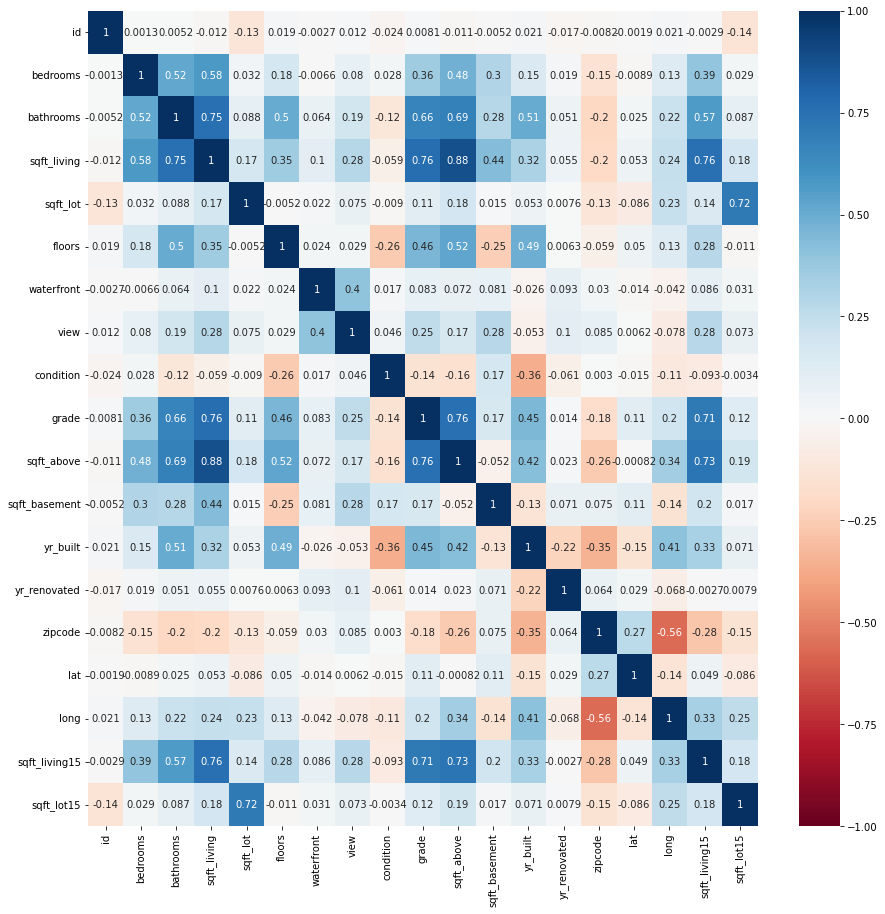

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(housing.drop(DropList,axis=1).corr(),cmap='RdBu',center=0,vmin=-1,vmax=1,annot=True)
plt.show()

Let's find out correlation of highly correlated features

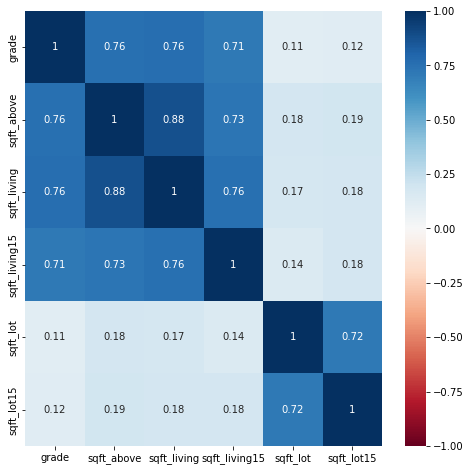

In [26]:
correlated_cloumn = ['grade','sqft_above','sqft_living','sqft_living15','sqft_lot','sqft_lot15']

plt.figure(figsize=(8,8))
sns.heatmap(housing[correlated_cloumn].corr(),cmap='RdBu',center=0,vmin=-1,vmax=1,annot=True)
plt.show()

### Principal Component Analysis of highly correlated features

In [27]:
X = housing.drop(DropList,axis=1)
y = housing.price

sc = StandardScaler()
X_sc = sc.fit_transform(X[correlated_cloumn])

# PCA
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_sc)


# Creating training and testing pca set
labels = ['PC'+ str(i) for i in range(1,n_components+1)]
pca_df = pd.DataFrame(X_pca,columns=labels[0:11])


# Adding principal component removing original features
housing_pca = pd.concat([X.reset_index(drop=True),y.reset_index(drop=True), pca_df],axis=1).drop(correlated_cloumn,axis=1)
housing_pca.head(3)

,id,bedrooms,bathrooms,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price,PC1,PC2,PC3
0,7129300520,3,1.00,1.0,0,0,3,0,1955,0,98178,47.5112,-122.257,221900,-1.646078,0.074387,0.157223
1,6414100192,3,2.25,2.0,0,0,3,400,1951,1991,98125,47.7210,-122.319,538000,-0.037840,-0.226714,0.497579
2,5631500400,2,1.00,1.0,0,0,3,0,1933,0,98028,47.7379,-122.233,180000,-1.534420,0.221294,-1.715761


**Let's check correlation again after PCA**

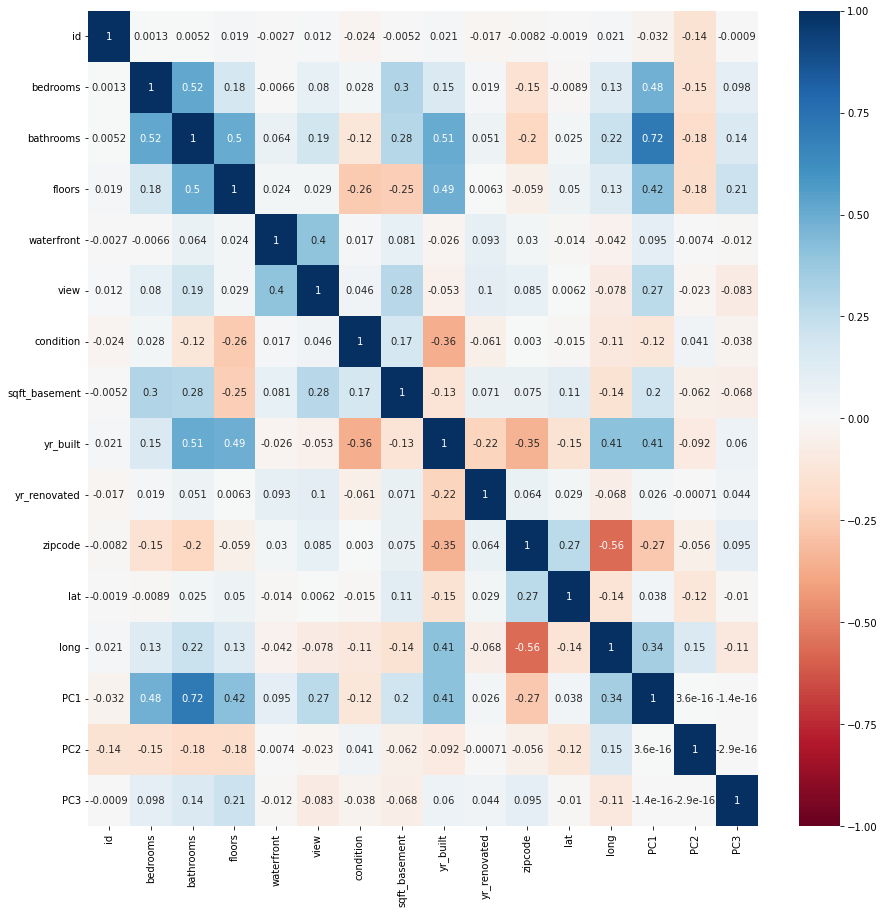

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(housing_pca.drop('price',axis=1).corr(),cmap='RdBu',center=0,
            vmin=-1,vmax=1,annot=True)        
plt.show()

Let's chek model result after PCA.

In [29]:
X_add_const = sm.add_constant(housing_pca)
lr = sm.OLS(housing['price'],X_add_const.drop('price',axis=1)).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     3103.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:04:52   Log-Likelihood:            -2.9471e+05
No. Observations:               21613   AIC:                         5.894e+05
Df Residuals:                   21596   BIC:                         5.896e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.825e+06   2.92e+06      0.966

No major difference in accuracy is observed after PCA.

### Checking 6th Assumption- No multi-colinearity
#### VIF Analysis

In [30]:
VIF_data = pd.DataFrame()
VIF_data['feature'] = housing_pca.drop('price',axis=1).columns
VIF_data["VIF"] = [variance_inflation_factor(housing_pca.drop('price',axis=1).values, i) 
                   for i in range(len(housing_pca.drop('price',axis=1).columns))]
VIF_data.sort_values(by='VIF',ascending=False).head()

,feature,VIF
0,id,3.630313
2,bathrooms,3.320414
13,PC1,2.600221
8,yr_built,2.033422
3,floors,1.933414


VIF of all columns are <6. Therefore no need to reduce feature. Let's check correlation of each column with price.

Let's remove some features based on trial and error

In [31]:
# Removing 'zipcode','condition','id','PC2'
DropList2 = ['price','zipcode','condition','id','PC2']
features = list(housing_pca.columns)

for list_ in DropList2:
    features.remove(list_)

X = housing_pca[features].copy()
y = housing_pca.price

# Model building
X_add_const = sm.add_constant(X)
lr = sm.OLS(y,X_add_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     3673.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:04:54   Log-Likelihood:            -2.9559e+05
No. Observations:               21613   AIC:                         5.912e+05
Df Residuals:                   21600   BIC:                         5.913e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -4.93e+07   1.57e+06    -31.306

No major difference in $R^2$. Let,s plot residual **`Y vs Residuals`**

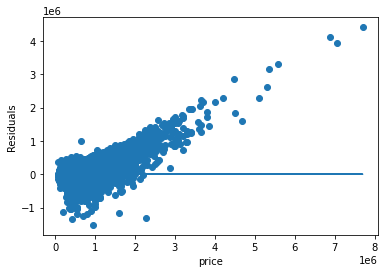

In [32]:
Residuals3 = lr.resid
plt.scatter(y,Residuals3)
plt.plot(y,[0]*len(y))
plt.xlabel('price')
plt.ylabel('Residuals')
plt.show()

Seems there is some crrelation between Residual and Dependent variable. Let's check how residual is related to dependent variable.

In [33]:
X_add_const = sm.add_constant(Residuals3)
lr = sm.OLS(y,X_add_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                 1.059e+04
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:04:55   Log-Likelihood:            -3.0329e+05
No. Observations:               21613   AIC:                         6.066e+05
Df Residuals:                   21611   BIC:                         6.066e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.401e+05   2045.842    263.993      0.0

**Conclusion?**
- $67.1\%$ of total $R^2$ can be explained by linear regression model.
- $32.9\%$ of total $R^2$ is explained by Residual.

**Let's check accuracy of model at different random_state**

In [34]:
for random_state in range(10,15):
    #creating training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=0.8, random_state=random_state)

    #Train the model and predicting the test dataset
    model = LinearRegression()      # Instatiate
    model.fit(X_train, y_train)     # Feeding data into model
    y_pred = model.predict(X_test)  # Predicting test set

    r2 = r2_score(y_test,y_pred)
    print(f'r2 at random_state {random_state} = ',np.round(r2,2))

r2 at random_state 10 =  0.68
r2 at random_state 11 =  0.67
r2 at random_state 12 =  0.66
r2 at random_state 13 =  0.69
r2 at random_state 14 =  0.66


**Let's normalize all independent feature and check accuracy**

In [35]:
for random_state in range(10,15):
    #creating training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=0.8, random_state=random_state)

    #Train the model and predicting the test dataset
    model = LinearRegression(normalize=True)      # Instatiate
    model.fit(X_train, y_train)     # Feeding data into model
    y_pred = model.predict(X_test)  # Predicting test set

    r2 = r2_score(y_test,y_pred)
    print(f'r2 at random_state {random_state} = ',np.round(r2,2))

r2 at random_state 10 =  0.68
r2 at random_state 11 =  0.67
r2 at random_state 12 =  0.66
r2 at random_state 13 =  0.69
r2 at random_state 14 =  0.66


**Let's standardize all independent feature and check accuracy**

In [36]:
# Standardizing X
for random_state in range(10,15):
    #creating training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=random_state)

    #Train the model and predicting the test dataset
    
    model = make_pipeline(StandardScaler(with_mean=True), LinearRegression())      # Instatiate
    model.fit(X_train, y_train)     # Feeding data into model
    y_pred = model.predict(X_test)  # Predicting test set

    r2 = r2_score(y_test,y_pred)
    print(f'r2 at random_state {random_state} = ',np.round(r2,2))

r2 at random_state 10 =  0.68
r2 at random_state 11 =  0.67
r2 at random_state 12 =  0.66
r2 at random_state 13 =  0.69
r2 at random_state 14 =  0.66


**There is no difference in accuracy after standardization and normalization.**

**Let's create Random forest model.**

In [37]:
for random_state in range(10,15):
    #creating training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=random_state)

    #Train the model and predicting the test dataset
    model = RandomForestRegressor()      # Instatiate
    model.fit(X_train, y_train)     # Feeding data into model
    y_pred = model.predict(X_test)  # Predicting test set

    r2 = r2_score(y_test,y_pred)
    print(f'r2 at random_state {random_state} = ',np.round(r2,2))

r2 at random_state 10 =  0.88
r2 at random_state 11 =  0.88
r2 at random_state 12 =  0.88
r2 at random_state 13 =  0.9
r2 at random_state 14 =  0.88


**Conclusion:** Random forest gives the better result with 88% accuracy.